# Лабораторная работа 1

## Задача о падении тела.Построение графиков функций.

## Белоус Мария Руслановна 28.02.2025

## Этап 1

In [2]:
import math 
math.sin(math.pi/2)

1.0

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as const
import sympy

## Этап 2

In [4]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска 
h_end = 3.0E+0 # вертикальная составляющая положения тела в момент движения
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещениетела за время полета
print(h_start,h_end)

1 3.0


In [5]:

g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

In [6]:
# примеры констант
const.pi, const.unit('speed of light in vacuum'), const.unit('Newtonian constant of gravitation')

(3.141592653589793, 'm s^-1', 'm^3 kg^-1 s^-2')

In [7]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)

In [8]:
#?range - функция для создания последовательностей, работает только с целыми числами  и на выходе возыращает инератор,используется для обычных циклов 
##?np.arange - поддерживает дробные шаги, возвращает массив, используется в основном для численных вычисленийВ

## Этап 3

Второй закон Ньютона гласит,что 
$$ F = ma $$
                                                  

,где F-сила,m - масса тела,a- ускорение
В даннои случае на тело действует только сила тяжести,которая направлена вниз и равна 
$$ F = m(0,-g) $$ 

,где g - ускорение свободного падения.
ускорение движения тела можно выразить как вторую производную $$ \text{a} =\left(S''_x(t),S''_y(t)\right) $$

В результате получим два уравнения: $$ S''_x(t) = 0, S''_y(t) = -g. $$  Из этого уравнения и начальных условий можно записать аналитичейский вид для функции $$ S_x(t) и S_y(t) $$ 

$$ S_x(t) = S_x(0) + v0_xt = 0 + v0_xt ,S_y(t) = S_y(0) + v0_yt - \frac{g}{2}t^2 = h_start + v0_yt - \frac{g}{a} t^2 $$ 

,где $$ v_0 = (v0_x,v0_y) $$ обозначает неизвестную скорость движения тела в начальный момент времени $$ t = 0 $$ 

In [9]:
v0_x = s_end/T
v0_x

1.6666666666666667

In [10]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

In [11]:
alpha = math.atan(v0_y/v0_x)
alpha,math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

In [12]:
f's_x(t) = {v0_x} t '

's_x(t) = 1.6666666666666667 t '

In [13]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

## Этап 4 .Построение графика траектории движения тела

In [14]:
t_list,t_array;

In [15]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+ v0_y*t-g*t**2/2 for t in t_list]

In [16]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

(0.0, 5.0, 0.0, 14.0)

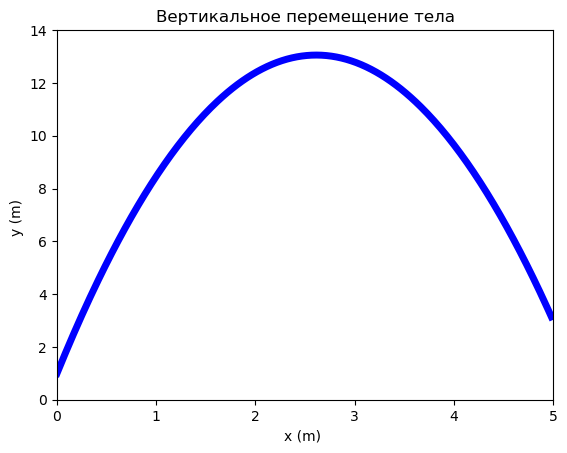

In [17]:
# со списком 
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m) ');plt.ylabel('y (m) ')
plt.axis([0,s_end, 0, h_end+11])

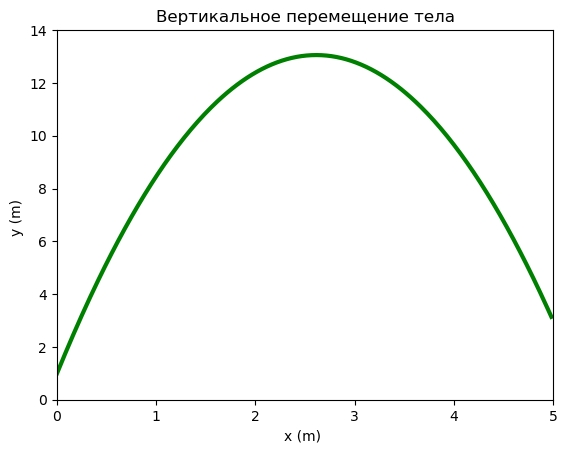

In [18]:
# С массивом 
plt.figure()
plt.plot(s_x_array, s_y_array, 'green', lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m) '); plt.ylabel('y (m) ')
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

## Задание 1.2. Определение момента времени касания телом земли 

1.Рассматриваем временной отрезок [0,t_{stop}],где t_stop выбирается так ,что тело уже коснулось земли.
2.Находим два соседних индекса k b k+1, таких что: $$ S_y(k)*S_y(k+1)<0 $$
Это означает,что между точками $$ (t(k),S_y(k)) и (t(k+1),S_y(k+1)) $$ произошло пересечение оси.
3.Так как функция $$ S_y(t) $$
между двумя найденными точками , то прямая, проходящая через две точки задается уравнением инерполяции:
$$ S_lin(t) = S_y(K) + \frac{s_y(k+1) - s_y(k)}{t(k+1) - t(k)} \cdot (t - t(k)) $$ 
,где $$ \frac{s_y(k+1)-S_y(k)}{t(k+1)-t(k)} $$ 
- угловой коэффициент.Заметим, что это похоже на уравнение $$ y = kx+b $$
4.Для вычисления "t" подставим 0 вместо s_{lin}(t) и получим формулу для t $$ t* = t(k) - (s_y(k) * \frac{t(k+1) -t(k)}{S_y(k+1)-S_y(k)} $$
t_{exact}- это точное время ,когда тело касается земли ,полученное аналитически.Оно находится путем решения уравнения s_{y}
(t) = 0 с использованием точной формулы для движения тела.В отличие от приближенного метода (линейной инерполяции),
который аппроксимирует t*,точнее значение t_{exact} определяется без численных допущений.
Относительная ошибка приближенного метода вычисляется по формуле: $$ \frac{|t* -t_exact|}{t_exact} * 100 $$

In [19]:
t_values = np.linspace(0, T, 100)
s_x_values = (s_end / T) * t_values  # Горизонтальное перемещение
s_y_values = h_start + v0_y * t_values - 0.5 * g * t_values**2  # Вертикальное перемещение

# Поиск индекса k
k = None
for i in range(len(s_y_values) - 1):
    if s_y_values[i] * s_y_values[i + 1] < 0:
        k = i
        break

# Проверка, найден ли индекс k
if k is not None:
    t_k = t_values[k]
    s_y_k = s_y_values[k]
    t_k_plus_1 = t_values[k + 1]
    s_y_k_plus_1 = s_y_values[k + 1]
    
    print(f"Пересечение с осью Y на t = {t_k}, s_y = {s_y_k}")
else:
    print("Нет пересечения с осью Y.")

Нет пересечения с осью Y.


## Задание 1.3. Построение секущей, касательной и нормали к графику функции

#### График траектории движения тела для t принадлежащему [0,T] из Задания 1.1:

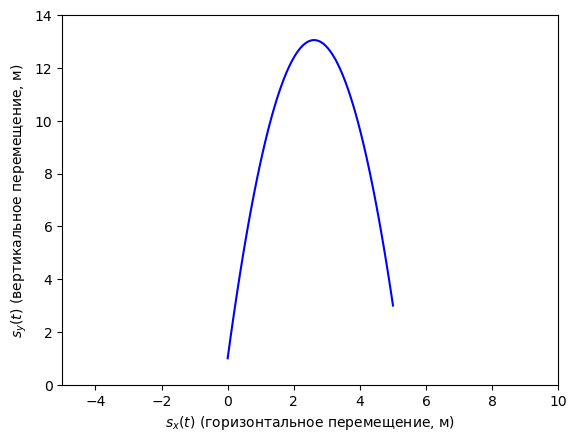

In [29]:
# Вычисление перемещений
s_x_values = (s_end / T) * t_values  # Горизонтальное перемещение

# Построение графика
plt.figure()
plt.plot(s_x_values, s_y_values, color='blue')
plt.xlabel('$s_x(t)$ (горизонтальное перемещение, м)')
plt.ylabel('$s_y(t)$ (вертикальное перемещение, м)')
plt.axis([-5, s_end + 5, 0, h_end + 11]);

#### График секущей прямой к траектории движения тела,проходящей через начальную точку при t = 0 и конечную точку при t=T

(-5.0, 10.0, 0.0, 14.0)

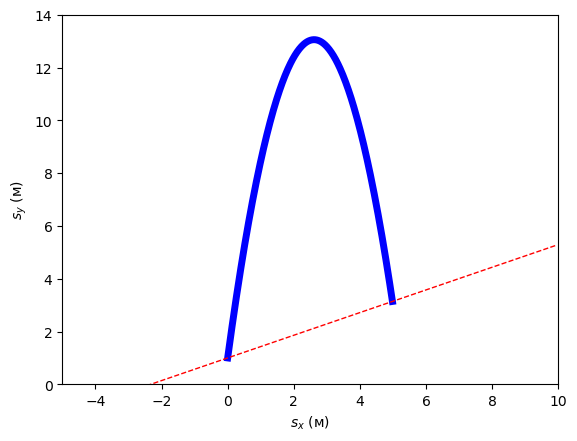

In [35]:
# Начальная и конечная точки
p_start = np.array([s_x_array[0], s_y_array[0]])
p_end = np.array([s_x_array[-1], s_y_array[-1]])

# Вектор, определяющий направление секущей прямой
a = p_end - p_start

# Точки для рисования секущей прямой
p = np.array([p_start + a * t for t in [-1, 2]])

# Построение графиков
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=5)
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=1)  # Секущая прямая
plt.xlabel('$s_x$ (м)')
plt.ylabel('$s_y$ (м)')
plt.axis([-5, s_end + 5, 0, h_end + 11])

#### График касательной прямой к траектории движения тела в начальной точке при t = 0:

(-5.0, 10.0, 0.0, 14.0)

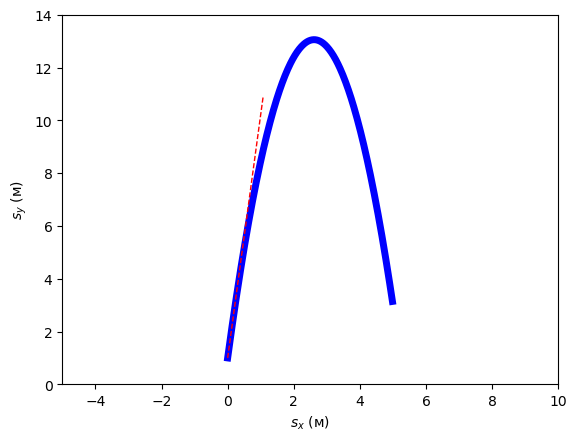

In [36]:
# Наклон касательной (производная в t=0)
s_x_derivative = s_end / T  # Скорость по оси X
s_y_derivative = v0_y - g * 0  # Скорость по оси Y при t=0

# Наклон касательной
m_tangent = s_y_derivative / s_x_derivative

# Определяем две точки для касательной прямой
tangent_length = 10  # Длина касательной
p_end_tangent = p_start + np.array([tangent_length / np.sqrt(1 + m_tangent**2), 
                                     m_tangent * (tangent_length / np.sqrt(1 + m_tangent**2))])

# Построение графиков
plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=5)

# Касательная прямая
plt.plot([p_start[0], p_end_tangent[0]], [p_start[1], p_end_tangent[1]], '--', color='red', lw=1)
plt.xlabel('$s_x$ (м)')
plt.ylabel('$s_y$ (м)')
plt.axis([-5, s_end + 5, 0, h_end + 11])

 #### График нормальной прямой к траектории движения тела в начальной точке при t = 0

(-5.0, 10.0, 0.0, 14.0)

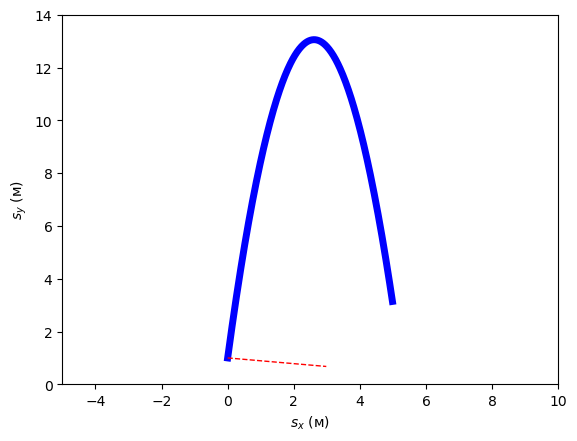

In [37]:
# Наклон нормальной прямой (перпендикулярная касательной)
m_normal = -1 / m_tangent

# Определяем две точки для нормальной прямой
normal_length = 3  # Длина нормали
p_end_normal = p_start + np.array([normal_length / np.sqrt(1 + m_normal**2), m_normal * (normal_length / np.sqrt(1 + m_normal**2))])

# Построение графиков
plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=5)

# Нормальная прямая
plt.plot([p_start[0], p_end_normal[0]], [p_start[1], p_end_normal[1]], '--', color='red', lw=1)
plt.xlabel('$s_x$ (м)')
plt.ylabel('$s_y$ (м)')
plt.axis([-5, s_end + 5, 0, h_end + 11])

#### График касательной прямой к траектории движения тела в одной графической области с траекторией движения и секущей прямой:

(-5.0, 10.0, 0.0, 14.0)

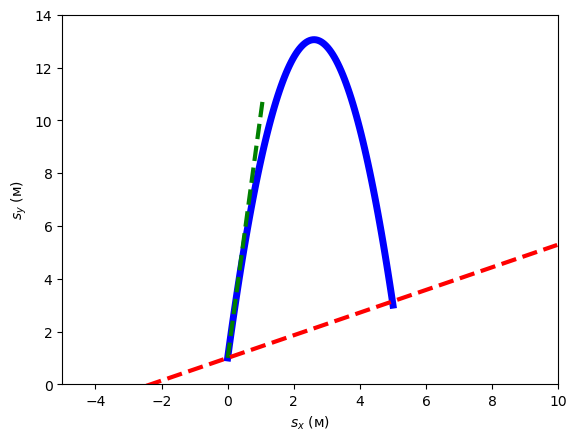

In [38]:
plt.figure()
plt.plot(s_x_values, s_y_values, 'b-', lw=5)
plt.plot([p_start[0], p_end_tangent[0]], [p_start[1], p_end_tangent[1]], '--', color='green', lw=3)  # Касательная прямая
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=3)  # Секущая прямая
plt.xlabel('$s_x$ (м)')
plt.ylabel('$s_y$ (м)')
plt.axis([-5, s_end + 5, 0, h_end + 11])

#### График нормальной прямой к траектории движения тела в момент времени t = 0 в одной графической области с траекторией движения, касательной и секущей прямой

(-5.0, 10.0, 0.0, 14.0)

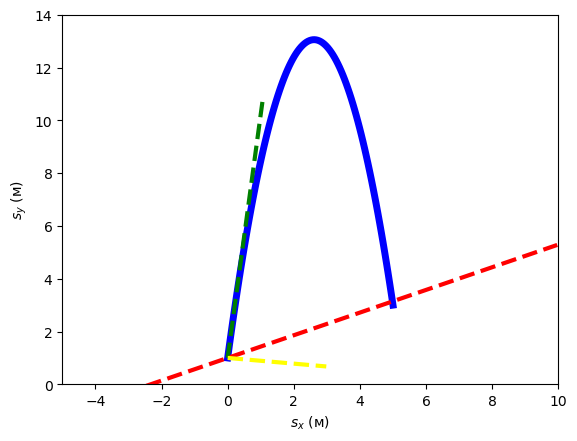

In [39]:
plt.figure()
plt.plot(s_x_values, s_y_values, 'b-', lw=5)
plt.plot([p_start[0], p_end_tangent[0]], [p_start[1], p_end_tangent[1]], '--', color='green', lw=3)  # Касательная прямая
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=3)  # Секущая прямая
plt.plot([p_start[0], p_end_normal[0]], [p_start[1], p_end_normal[1]], '--', color='yellow', lw=3)
plt.xlabel('$s_x$ (м)')
plt.ylabel('$s_y$ (м)')
plt.axis([-5, s_end + 5, 0, h_end + 11])

## Задание 1.4. Построение графиков функций

### Вариант 1

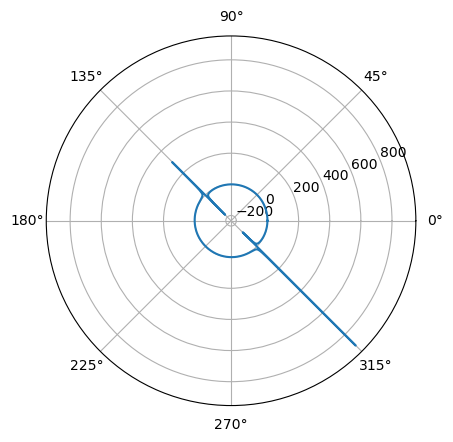

In [63]:

a = 1
phi = np.linspace(0, 2 * np.pi, 1000)
rho = (3 * a * np.sin(phi) * np.cos(phi)) / (np.sin(phi)**3 + np.cos(phi)**3 + 1e-10)
plt.polar(phi, rho)
plt.show()

## 1(b)

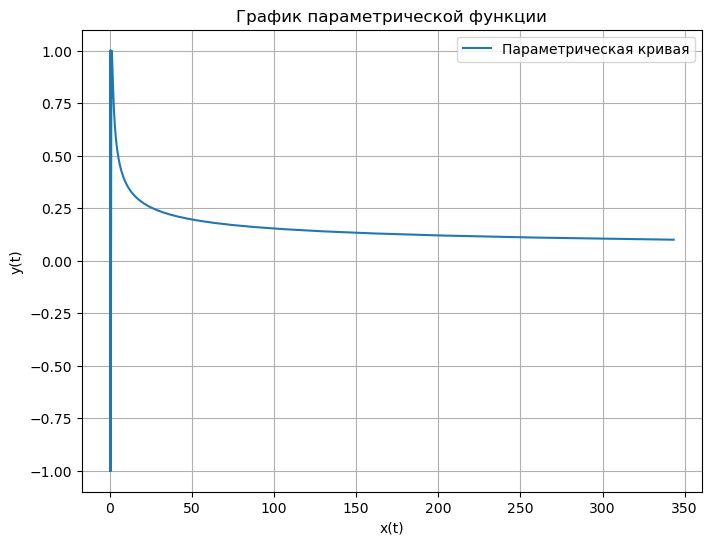

In [31]:

t = np.linspace(0.1, 10, 1000)
x = (3 * t**2 + 1) / (3 * t**3)
y = np.sin((t**3) / 3 + t)
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Параметрическая кривая')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('График параметрической функции')
plt.legend()
plt.grid()
plt.show()